# MNIST Image Classification

In [50]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
## loading MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Print the shape of the training and test data
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [40]:
# flattening the 2d arrays into a single array
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# normalising x_train and y_train
x_train = x_train / 255.0
x_test = x_test / 255.0

# one hot encoding the labels (digits 0-9)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Print the shape of the training and test data
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

Training data shape: (60000, 784)
Test data shape: (10000, 784)


In [46]:
# creating a sequential model
model = Sequential()

# adding the input layer with 784 neurons (one for each pixel)
model.add(Dense(784, input_shape=(784,), activation='relu'))

# Add a hidden layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))

# Add the output layer with 10 neurons and softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary to confirm the compilation
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 717,210 (2.74 MB)

 Trainable params: 717,210 (2.74 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
# Train the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_test, y_test),
                    verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9054 - loss: 0.3158 - val_accuracy: 0.9581 - val_loss: 0.1305
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9762 - loss: 0.0775 - val_accuracy: 0.9723 - val_loss: 0.0869
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9822 - loss: 0.0558 - val_accuracy: 0.9809 - val_loss: 0.0595
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9887 - loss: 0.0347 - val_accuracy: 0.9799 - val_loss: 0.0716
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9912 - loss: 0.0283 - val_accuracy: 0.9749 - val_loss: 0.1011
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9914 - loss: 0.0263 - val_accuracy: 0.9809 - val_loss: 0.0738
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9937 - loss: 0.0191 - val_accuracy: 0.9794 - val_loss: 0.0910
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9928 - loss: 0.0218 -

In [49]:
# Accuracy
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9773 - loss: 0.1133
Test Accuracy: 0.9809
Test Loss: 0.0901


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


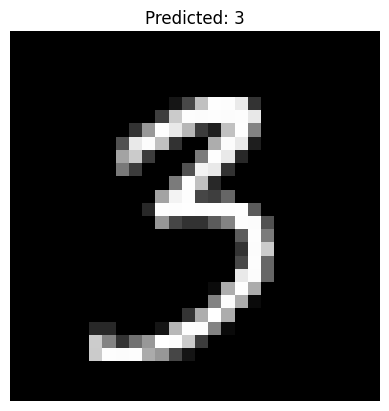

In [59]:
# Pick a random test image
index = np.random.randint(0, len(x_test))
image = x_test[index]

# Model prediction
prediction = model.predict(image.reshape(1, 784))  # Flatten to match model input
predicted_label = np.argmax(prediction)

# Plot the image with the predicted label
plt.imshow(image.reshape(28, 28), cmap="gray")
plt.title(f"Predicted: {predicted_label}")
plt.axis("off")
plt.show()